## Analysis of Crime in India 

Kashvi Chintan Shah| INM430_COURSEWORK

Data Source : https://www.kaggle.com/rajanand/crime-in-india
This Data file contains of +75 .csv files but for our analysis, we have picked up 01_District_wise_crimes_committed_IPC_2001_2012.csv file. 

Import Libraries
When we import modules or libaraies we're able to call functions that are not built into Python. 

In [1]:
# importing all the libaries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import zscore
from scipy.stats import stats

Data Preparation

In [2]:
# import the dataset
# This dataset contains crimes commited with informations such as district, year and states
IPC_2001_2012=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
IPC_2001_2012.head(2)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125


Our dataset consist of 33 features and 9017 instances. We plan and hope to use all the features to give clear analysis of our dataset.

Group by the data on the basis of the year and state to work on some reaserch questions. 

In [3]:
# split the data state_wise and year_wise to work on few research question
state_wise=pd.DataFrame(IPC_2001_2012.groupby(['STATE/UT'])['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().reset_index())
state_wise.head(2)

<ipython-input-3-585e048e72ef>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_wise=pd.DataFrame(IPC_2001_2012.groupby(['STATE/UT'])['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().reset_index())


,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,A & N ISLANDS,320,130,42,218,0,218,188,154,34,...,22,196,2210,12,428,86,242,0,84,8886
1,ANDHRA PRADESH,63512,44840,3526,26958,4,26954,42478,29872,12606,...,6214,23936,1093130,12430,103998,72262,238014,34,276870,964504


In [4]:
year_wise=pd.DataFrame(IPC_2001_2012.groupby(['YEAR'])['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().reset_index())
year_wise.head(2)

<ipython-input-4-16fcd4e3d30a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_wise=pd.DataFrame(IPC_2001_2012.groupby(['YEAR'])['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().reset_index())


,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,2001,72404,63046,6734,32150,0,32150,44974,29290,15684,...,3366,21068,542974,13702,68248,19492,98340,228,114364,1402724
1,2002,70580,60760,7248,32746,6,32740,43700,29012,14688,...,3044,23640,530050,13644,67886,20310,98474,152,128088,1460594


Let's check first if we have any missing values.

In [5]:
# Check if their is any missing values or not
IPC_2001_2012.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

This indicates that none of our column have 0 values. Hence, its safe to say that our data is quite clean.

Let's check some summary statistics of our dataframe. 

In [6]:
IPC_2001_2012.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


Outliers are present or not. 

<AxesSubplot:xlabel='STATE/UT', ylabel='RAPE'>

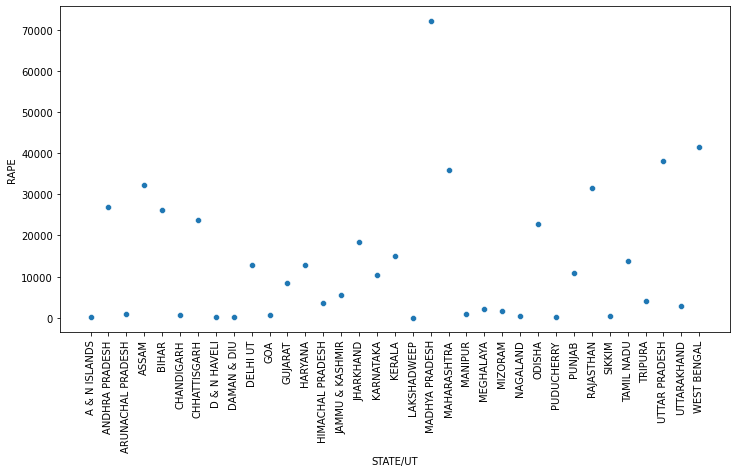

In [7]:
# Now lets check if there are any outliers and decide if we should remove them or not. 
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.scatterplot(data=state_wise, x='STATE/UT', y='RAPE')

Extract Rape column from state_wise dataframe to see which outliers are getting deleted.

In [8]:
Outliers2 =  pd.DataFrame(columns=["RAPE"], data=state_wise)

Zscore is applied on the column. The formula of Zscore is (row value - mean of the value)/ standard deviation of the column.

In [9]:
z_scores = stats.zscore(Outliers2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
new_df = Outliers2[filtered_entries]

new_df

,RAPE
0,218
1,26958
2,1000
3,32356
4,26248
5,562
6,23676
7,112
8,40
9,12848


Z-score (A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units.) 
Now, if see the new table, which contains Rape column, extracted from state_wise dataframe and apply zscore, we see that state Madhya Pradesh has been removed but in reality that's the state which had most number of rape cases. Hence, we are choosing not to deal with the outliers as it even disturb the real data and give us wrong answers. 

In [10]:
# copy the datset into a new dataframe so that your original data set does not get clumsy.
IPC_2001_2012_copy = IPC_2001_2012.copy()

*****************************************************************************************************************************

 Research Question 1: What is the crime per capita (per 100,000 people) for each year? Using the data obtained, find out which year was the safest among all.

Here we are using year_wise dataset. As we do not have total population of each year, we manaully added them as a column. The data given for the population is acquired by an online source. 
Source : https://www.macrotrends.net/countries/IND/india/population

In [11]:
year_wise['POPULATION'] = [1075000085, 1093317189, 1111523144, 1129623456, 1147609927, 1165486291,1183209472,1200669765,1217726215,1234281170,1250287943,1265780247]
year_wise.head(2)

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,POPULATION
0,2001,72404,63046,6734,32150,0,32150,44974,29290,15684,...,21068,542974,13702,68248,19492,98340,228,114364,1402724,1075000085
1,2002,70580,60760,7248,32746,6,32740,43700,29012,14688,...,23640,530050,13644,67886,20310,98474,152,128088,1460594,1093317189


Similarly, we have to add another column, which will calculate total cases for each year. 

In [12]:
# Second we will adding all the columns and find total cases each year
year_wise["total_cases_yearwise"] = year_wise.iloc[:,1:30].sum(axis=1)

Finally we will be finding crimes per capita. Here we have kept 100,000 as the values were quite high for the total cases each year. 

In [13]:
def capita(row):
    result = (row["total_cases_yearwise"] / row["POPULATION"]) * 100000
    return result

In [14]:
# Now lets add that in our dataframe and further do some analysis.

In [15]:
year_wise['capita'] = year_wise.apply(capita, axis=1)

In [16]:
# Subset of year_wise dataframe is created to do further analysis
Subset = year_wise[["YEAR","POPULATION","total_cases_yearwise","capita"]]
Subset.columns = ["Year","Population","Total_cases","Capita"]
Subset.head()

,Year,Population,Total_cases,Capita
0,2001,1075000085,4121346,383.380993
1,2002,1093317189,4132030,377.935154
2,2003,1111523144,3994392,359.362018
3,2004,1129623456,4293230,380.058503
4,2005,1147609927,4273808,372.409466


Here we will be computing national crime rate and use this to compare each year wise crime rate. Furthermore, we will compute
the percentage difference of the national average crime rate to each year. 

In [17]:
totalpop = Subset['Population'].sum()
totalcrimes = Subset['Total_cases'].sum() 
average_per_cap = (totalcrimes/totalpop)*100000

Now, lets find the Mean deviation. Mean deviation means the difference between the observed value and the expected value of a variable.

In [18]:
def difference(row):
    dif = row['Capita'] - average_per_cap
    return dif

In [19]:
Subset['Mean_dev'] = Subset.apply(difference,axis=1)

<ipython-input-19-c583d856ab21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subset['Mean_dev'] = Subset.apply(difference,axis=1)


Now, lets find by how much percenatge there has been increase in each of the year.

In [20]:
def percentage(row):
    percent = (row['Capita'] / average_per_cap)*100
    if percent > 100:
        return "+" + str(int(percent-100))
    else:
        return"-" + str(100-int(percent))

In [21]:
Subset['Percentage'] = Subset.apply(percentage, axis=1)

<ipython-input-21-5c30ae62ea72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subset['Percentage'] = Subset.apply(percentage, axis=1)


In [22]:
ranked_by_population = Subset.sort_values(by=['Capita'], ascending=True)

In [23]:
ranked_by_population

,Year,Population,Total_cases,Capita,Mean_dev,Percentage
2,2003,1111523144,3994392,359.362018,-39.048559,-10
4,2005,1147609927,4273808,372.409466,-26.001111,-7
5,2006,1165486291,4391972,376.836007,-21.574570,-6
1,2002,1093317189,4132030,377.935154,-20.475423,-6
3,2004,1129623456,4293230,380.058503,-18.352073,-5
0,2001,1075000085,4121346,383.380993,-15.029584,-4
6,2007,1183209472,4646028,392.663185,-5.747392,-2
7,2008,1200669765,4923736,410.082451,11.671874,+2
8,2009,1217726215,5001594,410.732227,12.321650,+3
9,2010,1234281170,5231510,423.850750,25.440174,+6


In [24]:
Subset

,Year,Population,Total_cases,Capita,Mean_dev,Percentage
0,2001,1075000085,4121346,383.380993,-15.029584,-4
1,2002,1093317189,4132030,377.935154,-20.475423,-6
2,2003,1111523144,3994392,359.362018,-39.048559,-10
3,2004,1129623456,4293230,380.058503,-18.352073,-5
4,2005,1147609927,4273808,372.409466,-26.001111,-7
5,2006,1165486291,4391972,376.836007,-21.574570,-6
6,2007,1183209472,4646028,392.663185,-5.747392,-2
7,2008,1200669765,4923736,410.082451,11.671874,+2
8,2009,1217726215,5001594,410.732227,12.321650,+3
9,2010,1234281170,5231510,423.850750,25.440174,+6


Now let's prepare this data for visualization. Further the capita hads been converted to an array. 

In [25]:
capita_array = np.array(Subset['Capita'])
capita_array

array([383.38099294, 377.93515382, 359.36201793, 380.05850332,
       372.40946592, 376.8360069 , 392.66318517, 410.08245094,
       410.73222687, 423.85075031, 437.5384111 , 441.95823195])

No handles with labels found to put in legend.


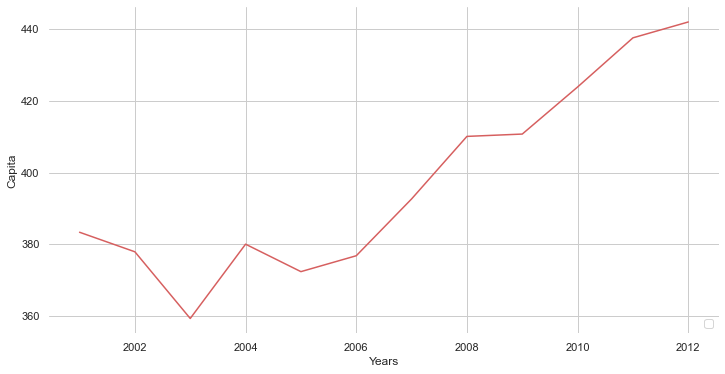

In [26]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot the capita
sns.set_color_codes("muted")
sns.lineplot(x="Year", y="Capita", data=Subset, color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Capita",
       xlabel="Years")
sns.despine(left=True, bottom=True)
plt.show()

Observed Results for reasearch question 1: 

As we can understand from the above table and graph that, 2012 had the highest number of cases and it has 10% more cases than the average capita. On the contrary, 2003 had 10% less cases than the average capita and also had least number of cases. So, 2003 was the safest among all the year.

*******************************************************************************************************************************

Research Question 2: Find the maximum number in each crime and where it happenend?

To find the max number of each crime and which state it is from, we need to use state_wise data to subset those in a different
dataframe.

In [27]:
# First lets find the state where each of the crime had maximum value.
max1 = state_wise.loc[state_wise[['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE']].idxmax(axis=0)]['STATE/UT']
max_state = pd.DataFrame(max1)
max_state.head(2)

,STATE/UT
32,UTTAR PRADESH
32,UTTAR PRADESH


In [28]:
# This is to add index as a column. And manually change the name of the columns

In [29]:
max_statewise = max_state.reset_index()
max_statewise.columns = ["index_of_states","States"]

In [30]:
max_statewise.head(2)

,index_of_states,States
0,32,UTTAR PRADESH
1,32,UTTAR PRADESH


In [31]:
# Second let's find which index had the max value.

In [32]:
max2 = state_wise[['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE']].idxmax(axis=0)
max_crime= pd.DataFrame(max2,columns=['index_to check'])
max_crime.head(2)

,index_to check
MURDER,32
ATTEMPT TO MURDER,32


In [33]:
max_crimewise = max_crime.reset_index()
max_crimewise.columns = ["index_of_crimes","indexing"]

In [34]:
max_crimewise.head(2)

,index_of_crimes,indexing
0,MURDER,32
1,ATTEMPT TO MURDER,32


Finally, find the maximum value in each column.

In [35]:
max3 = state_wise[['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE']].max(axis=0)
max_values = pd.DataFrame(max3, columns=['max_values'])
max_values.head(2)

,max_values
MURDER,130886
ATTEMPT TO MURDER,121040


In [36]:
max_valuewise = max_values.reset_index()
max_valuewise.columns = ["index_of_crimes1","max_values"]

In [37]:
max_valuewise.head(2)

,index_of_crimes1,max_values
0,MURDER,130886
1,ATTEMPT TO MURDER,121040


Concatenate these into a dataframe on the basis of their one common column. So first let's concatenate these three columns.

In [38]:
# Concatenate these into a dataframe on the basis of their one common column. 
pre_results = pd.concat([max_statewise,max_crimewise,max_valuewise],axis=1)

In [39]:
pre_results.head()

,index_of_states,States,index_of_crimes,indexing,index_of_crimes1,max_values
0,32,UTTAR PRADESH,MURDER,32,MURDER,130886
1,32,UTTAR PRADESH,ATTEMPT TO MURDER,32,ATTEMPT TO MURDER,121040
2,32,UTTAR PRADESH,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,32,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,34532
3,19,MADHYA PRADESH,RAPE,19,RAPE,72174
4,3,ASSAM,CUSTODIAL RAPE,3,CUSTODIAL RAPE,10


In [40]:
results_final = pre_results.drop(columns=['index_of_states','indexing','index_of_crimes1'],axis=1)

In [41]:
# Our final table to do some visualization. 
results_final.head(5)

,States,index_of_crimes,max_values
0,UTTAR PRADESH,MURDER,130886
1,UTTAR PRADESH,ATTEMPT TO MURDER,121040
2,UTTAR PRADESH,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,34532
3,MADHYA PRADESH,RAPE,72174
4,ASSAM,CUSTODIAL RAPE,10


Take top 10 crimes and plot it.

In [42]:
# take top 10 crimes and plot it.
top_10 = results_final.sort_values(['max_values'], ascending=[False])

In [43]:
top_10_crimes = top_10.head(10)
top_10_crimes

,States,index_of_crimes,max_values
13,MAHARASHTRA,THEFT,1113614
21,ANDHRA PRADESH,HURT/GREVIOUS HURT,1093130
15,MAHARASHTRA,OTHER THEFT,777150
12,MAHARASHTRA,BURGLARY,371234
14,MAHARASHTRA,AUTO THEFT,336464
18,RAJASTHAN,CHEATING,281600
27,TAMIL NADU,CAUSING DEATH BY NEGLIGENCE,280386
25,WEST BENGAL,CRUELTY BY HUSBAND OR HIS RELATIVES,261336
16,BIHAR,RIOTS,210192
23,MADHYA PRADESH,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MO...,159756


Here, lets convert max_values into an array, and divided by 1000 so, that it is easy to plot.

In [44]:
crimes1 = np.array(top_10_crimes['max_values']//1000)
crimes1

array([1113, 1093,  777,  371,  336,  281,  280,  261,  210,  159],
      dtype=int64)

No handles with labels found to put in legend.


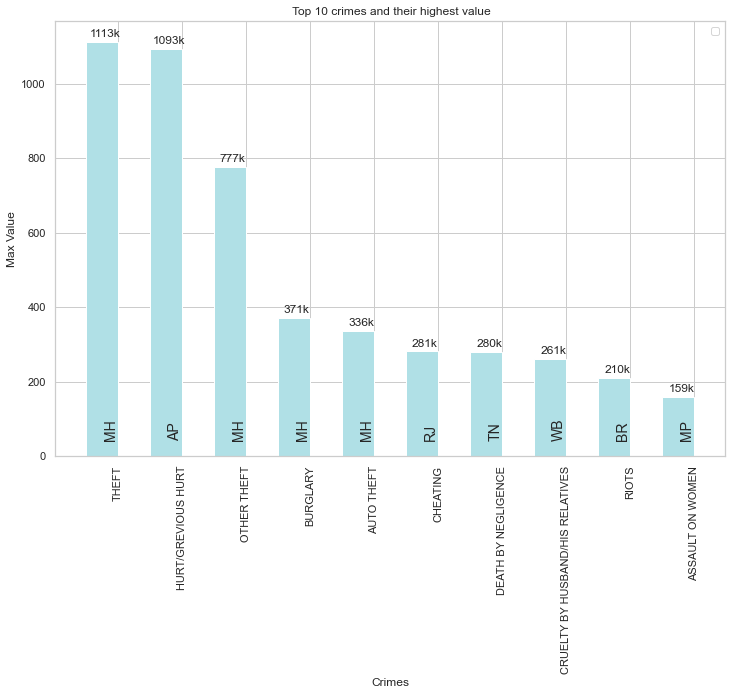

In [45]:
labels =  ['THEFT','HURT/GREVIOUS HURT','OTHER THEFT','BURGLARY','AUTO THEFT','CHEATING','DEATH BY NEGLIGENCE','CRUELTY BY HUSBAND/HIS RELATIVES','RIOTS','ASSAULT ON WOMEN']

crimes = crimes1

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, crimes, width,color=['powderblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Max Value')
ax.set_xlabel('Crimes')
ax.set_title(' Top 10 crimes and their highest value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # K defines 1000
        ax.annotate('{}k'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)

plt.text(0,50,"MH",ha='right',fontsize=14,rotation="vertical")
plt.text(1,50,"AP",ha='right',fontsize=14,rotation="vertical")
plt.text(2,50,"MH",ha='right',fontsize=14,rotation="vertical")
plt.text(3,50,"MH",ha='right',fontsize=14,rotation="vertical")
plt.text(4,50,"MH",ha='right',fontsize=14,rotation="vertical")
plt.text(5,50,"RJ",ha='right',fontsize=14,rotation="vertical")
plt.text(6,50,"TN",ha='right',fontsize=14,rotation="vertical")
plt.text(7,50,"WB",ha='right',fontsize=14,rotation="vertical")
plt.text(8,50,"BR",ha='right',fontsize=14,rotation="vertical")
plt.text(9,50,"MP",ha='right',fontsize=14,rotation="vertical")


plt.show()

Observed results for research question 2:

As, you can see from above bar plot that we have plotted top 10 crimes with their labelled value and state abbrieviation. Theft had most amount of cases over the years. We have plotted just top 10 crimes and even after that their is a huge difference between the cases from theft and assault on women with intent to outrage her modesty. The difference between them almost comes upto 950,000. Maharastra has maximum amount of theft cases. 

Abbreviation - https://kb.bullseyelocations.com/article/60-india-state-codes

*************************************************************************************************************************

Reserch Question 3 - Which crimes had maximum number of cases? Pick out top 10 crimes from the dataset and show a pie chart visual with their contributed percentage in the total number of cases.

For this question, we will be using state_wise dataframe. 

In [46]:
state_wise_copy = state_wise.copy()

We have .set_index() on the state column to make it into a index for further analysis.

In [47]:
state_wise_copy.set_index("STATE/UT")

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,320,130,42,218,0,218,188,154,34,30,...,22,196,2210,12,428,86,242,0,84,8886
ANDHRA PRADESH,63512,44840,3526,26958,4,26954,42478,29872,12606,3974,...,6214,23936,1093130,12430,103998,72262,238014,34,276870,964504
ARUNACHAL PRADESH,1682,834,72,1000,0,1000,1714,1116,598,520,...,104,500,10314,4,1568,36,334,0,1490,14792
ASSAM,30864,11324,1436,32356,10,32346,55878,45840,10038,8340,...,1796,15836,138366,2552,27240,224,78776,16,60410,362708
BIHAR,82490,81838,7344,26248,4,26244,74440,38778,35662,22198,...,1652,17018,378532,27096,15152,452,51360,880,88884,1077182
CHANDIGARH,486,602,158,562,0,562,1280,1068,212,62,...,54,124,1632,84,628,286,1614,0,196,23210
CHHATTISGARH,24120,15820,696,23676,0,23676,6690,5260,1430,2936,...,1156,6294,170052,2284,38330,3450,19146,10,50864,491710
D & N HAVELI,216,62,6,112,0,112,282,188,94,80,...,28,110,636,2,100,8,76,0,296,3718
DAMAN & DIU,136,76,4,40,0,40,62,30,32,68,...,60,68,380,6,30,4,70,0,622,1322


Now, lets find total value for each of the crime and rename them. 

In [48]:
top_crimes = state_wise_copy.iloc[:,1:30].sum(axis=0)

In [49]:
top_crimes_df = pd.DataFrame(top_crimes, columns=["total_values_each_crime"])

In [50]:
top_crimes_df.head()

,total_values_each_crime
MURDER,805086
ATTEMPT TO MURDER,703954
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,89228
RAPE,478274
CUSTODIAL RAPE,52


Find top 10 crimes

In [51]:
top_crimes_df_desc = top_crimes_df.sort_values(['total_values_each_crime'], ascending=[False])
top_crimes_df_desc_10 = top_crimes_df_desc.head(10)

Convert them into array for plotting

In [52]:
toatl_crime = np.array(top_crimes_df_desc_10['total_values_each_crime'])
toatl_crime

array([19605658,  7001060,  6743752,  4460320,  2540740,  2234678,
        2003728,  1750402,  1549854,  1535194], dtype=int64)

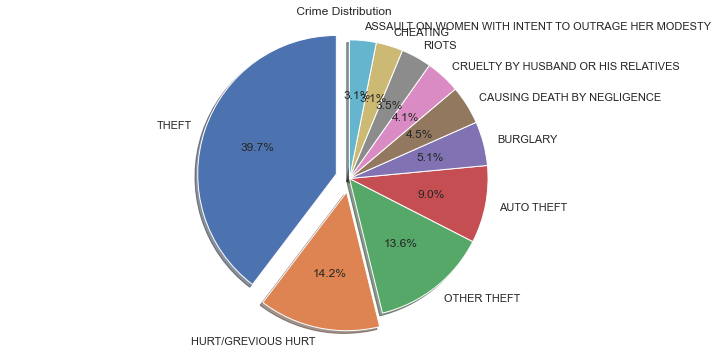

In [53]:
mylabels = 'THEFT','HURT/GREVIOUS HURT','OTHER THEFT','AUTO THEFT','BURGLARY','CAUSING DEATH BY NEGLIGENCE','CRUELTY BY HUSBAND OR HIS RELATIVES','RIOTS','CHEATING','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
sizes = toatl_crime
explode = (0.1, 0.1, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0 )  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes,explode = explode, labels=mylabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(" Crime Distribution")
plt.show()

Observation results for question 3

As you can see from above graph that, crime theft takes up almost 40% of the total data and remaining 60% is divided among 28 other crimes. Although for the pie chart we have visualized only top 10 crimes. One more observation made is that top 5 crimes which constitutes almost 80% of the data are all non-violent crimes. 

****************************************************************************************************************************

Research Question 4 - Which state has the highest number of crimes?

Using the same dataset we derived for question 2.

In [54]:
results_final.head()

,States,index_of_crimes,max_values
0,UTTAR PRADESH,MURDER,130886
1,UTTAR PRADESH,ATTEMPT TO MURDER,121040
2,UTTAR PRADESH,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,34532
3,MADHYA PRADESH,RAPE,72174
4,ASSAM,CUSTODIAL RAPE,10


Now, group the dataset on the basis of states column

In [55]:
state_group1 =  pd.DataFrame(results_final['States'].value_counts())

In [56]:
state_group1

,States
MAHARASHTRA,7
UTTAR PRADESH,7
BIHAR,4
MADHYA PRADESH,3
WEST BENGAL,2
ANDHRA PRADESH,2
RAJASTHAN,1
TAMIL NADU,1
ASSAM,1


Convert the max_values into an array

In [57]:
grouped_states_values = np.array(state_group1['States'])
grouped_states_values

array([7, 7, 4, 3, 2, 2, 1, 1, 1], dtype=int64)

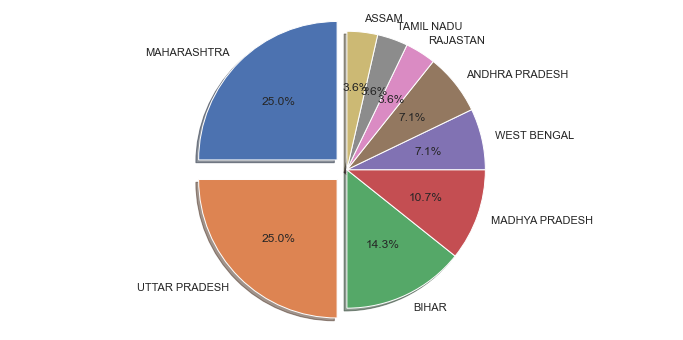

In [58]:
mylabels1 = 'MAHARASHTRA','UTTAR PRADESH','BIHAR','MADHYA PRADESH','WEST BENGAL','ANDHRA PRADESH','RAJASTAN','TAMIL NADU','ASSAM'
sizes1 = grouped_states_values
explode1 = (0.1, 0.1, 0, 0 ,0 ,0 ,0 ,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes1,explode = explode1, labels=mylabels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Observation result for research question 4:

As observed from the above graph that states Maharashtra  and Uttar Pradesh constitutes 25% each of the total. This means that out of 28 crimes, the highest number of cases noticed for each crime with their state, Maharashtra  and Uttar Pradesh were accounted for 14 of these. Hence, these two places are quite unsafe to live in.

******************************************************************************************************************************

Research question 5: What is trend for crime over the years?

For this research question, we will be using our original dataset.

First, we will remove District column as it is not needed here.

In [59]:
IPC_2001_2012_new = IPC_2001_2012.drop(columns=["DISTRICT"],axis=1)

Second, make Crime head dictionary which has sum aggregation of all the crimes and one list which consist of the crimes

In [60]:
with_out_agg=['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE']

with_agg = {'MURDER':sum,'ATTEMPT TO MURDER':sum,'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER':sum,'RAPE':sum,'CUSTODIAL RAPE':sum,'OTHER RAPE':sum,'KIDNAPPING & ABDUCTION':sum,'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS':sum,'KIDNAPPING AND ABDUCTION OF OTHERS':sum,'DACOITY':sum,'PREPARATION AND ASSEMBLY FOR DACOITY':sum,'ROBBERY':sum,'BURGLARY':sum,'THEFT':sum,'AUTO THEFT':sum,'OTHER THEFT':sum,'RIOTS':sum,'CRIMINAL BREACH OF TRUST':sum,'CHEATING':sum,'COUNTERFIETING':sum,'ARSON':sum,'HURT/GREVIOUS HURT':sum,'DOWRY DEATHS':sum,'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY':sum,'INSULT TO MODESTY OF WOMEN':sum,'CRUELTY BY HUSBAND OR HIS RELATIVES':sum,'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES':sum,'CAUSING DEATH BY NEGLIGENCE':sum}


Last, groupby on the basis of states and years using the crime head dictionary

In [61]:
crimesYear = IPC_2001_2012_new.groupby(["STATE/UT","YEAR"], as_index=False).agg(with_agg)
crimesYear.head()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE
0,A & N ISLANDS,2001,26,0,0,6,0,6,4,4,...,16,4,8,236,0,38,2,18,0,0
1,A & N ISLANDS,2002,34,6,2,4,0,4,4,2,...,22,0,4,194,0,34,6,8,0,0
2,A & N ISLANDS,2003,42,8,2,4,0,4,4,4,...,26,0,16,220,0,18,4,14,0,0
3,A & N ISLANDS,2004,30,2,4,20,0,20,6,6,...,24,0,18,210,0,12,6,10,0,12
4,A & N ISLANDS,2005,28,6,6,8,0,8,4,2,...,26,0,12,158,0,22,2,10,0,6


Making all the crime heads as a single categorical column

In [62]:
crimesyear_1 = crimesYear.melt(id_vars = ["STATE/UT", "YEAR"], value_vars = with_out_agg, var_name = 'Crime Head',value_name='no. of crimes')
crimesyear_1.head()

,STATE/UT,YEAR,Crime Head,no. of crimes
0,A & N ISLANDS,2001,MURDER,26
1,A & N ISLANDS,2002,MURDER,34
2,A & N ISLANDS,2003,MURDER,42
3,A & N ISLANDS,2004,MURDER,30
4,A & N ISLANDS,2005,MURDER,28


Number of each crimes dependent on year for each states altogether

<AxesSubplot:title={'center':'Year wise Crime Head'}, xlabel='YEAR', ylabel='no. of crimes'>

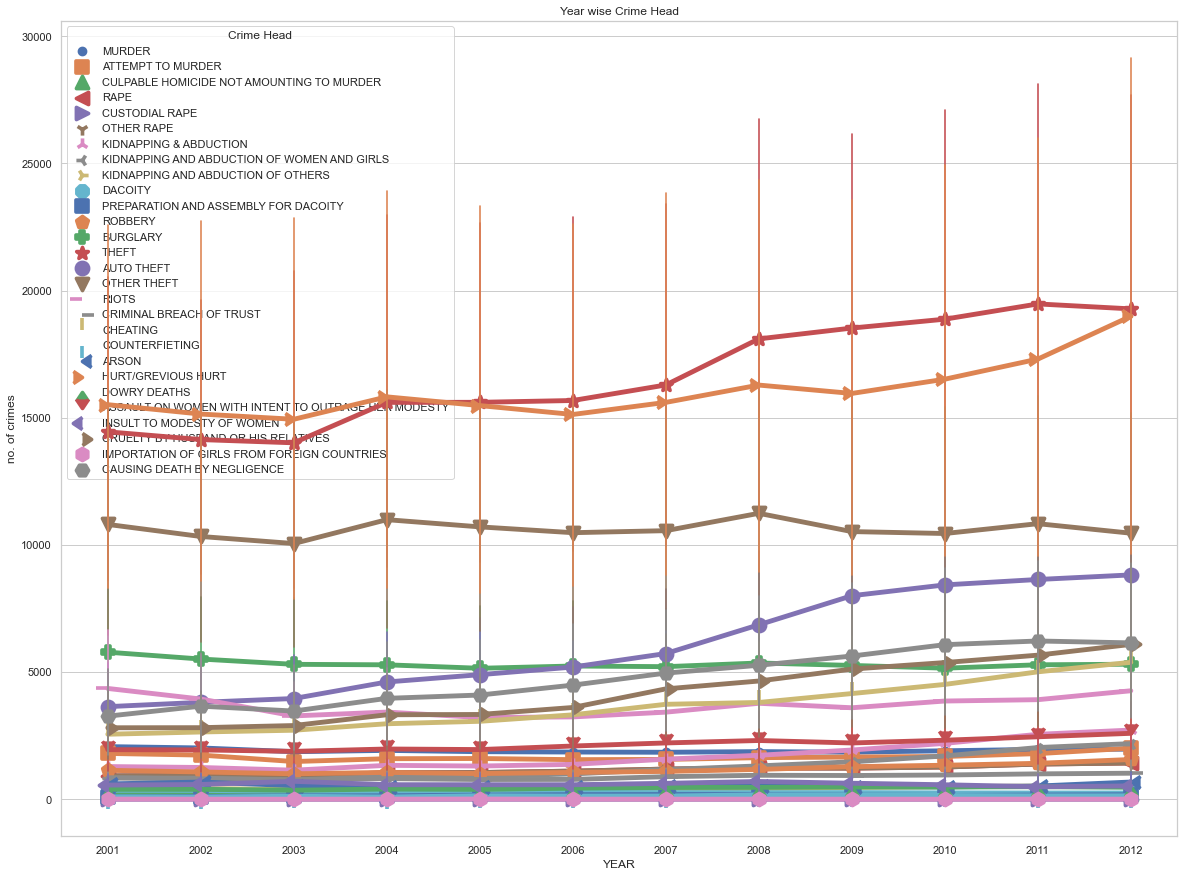

In [63]:
plt.figure(figsize=(20,15))
plt.title('Year wise Crime Head')
sns.set(style="ticks",rc={"lines.linewidth": 0.9})
sns.pointplot(data=crimesyear_1, x = 'YEAR',  y = 'no. of crimes', hue = 'Crime Head',markers=['.',',','^','<','>','1','2','3','4','8','s','p','P','*','o','v',0,1,2,3,4,5,6,7,8,9,'h','H'],palette='deep',scale = 3)

Observed result for question 5:

As you can see from above graph that Hurt and Theft were fighting for first position from the years 2001 to 2012. These two had maximum number of crimes and seeing by the trend we can understand that maximum numbers of crime reported were of hurt and theft. Auto theft was also increasing over the years, cases reported were almost double in 2012 than 2001. One positive trend, we can see here is that riots have consistently decreasing over the years. All other crimes have been consistent from 2001 to 2012 

*****************************************************************************************************************************

Regression Model

Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. For our dataset we will applying a multiple linear regression which is statistical technique that uses several explanatory variables to predict the outcome of a response variable. 

We will be building two multiple linear regression models by predicting the value of the year 2012. Hence, for both the models my target variable will be year 2012.

A regression model involving multiple variables can be represented as:

y = b0 + m1b1 + m2b2 + m3b3 + ... mnbn

In [64]:
year_wise.head(2)

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,POPULATION,total_cases_yearwise,capita
0,2001,72404,63046,6734,32150,0,32150,44974,29290,15684,...,13702,68248,19492,98340,228,114364,1402724,1075000085,4121346,383.380993
1,2002,70580,60760,7248,32746,6,32740,43700,29012,14688,...,13644,67886,20310,98474,152,128088,1460594,1093317189,4132030,377.935154


We do not need other IPC crimes, total cases, population and capita for our model. Hence, we make a subset for year_wise dataframe and add remaining columns on to new dataframe.

In [65]:
year_wise1 =  year_wise.iloc[:,0:29]

In [66]:
year_wise1.head()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE
0,2001,72404,63046,6734,32150,0,32150,44974,29290,15684,...,89454,3366,21068,542974,13702,68248,19492,98340,228,114364
1,2002,70580,60760,7248,32746,6,32740,43700,29012,14688,...,92542,3044,23640,530050,13644,67886,20310,98474,152,128088
2,2003,65432,51884,8058,31694,2,31692,39984,26592,13392,...,94956,4110,18730,522888,12416,65878,24650,101406,92,121344
3,2004,67216,55780,7870,36466,4,36462,46654,31156,15498,...,103878,3058,17274,553736,14052,69134,20002,116242,178,138846
4,2005,65438,56062,7156,36718,14,36704,45664,31500,14164,...,107250,4766,16902,541722,13574,68350,19968,116638,298,143396


Now, we need year column to the header of each column, hence we make year column as an index and then transpose it.

In [67]:
year_wise1.set_index("YEAR",inplace=True)

In [68]:
year_wise2 = year_wise1.transpose()

In [69]:
year_wise2.head()

YEAR,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
MURDER,72404,70580,65432,67216,65438,64962,64636,65532,64738,66670,68610,68868
ATTEMPT TO MURDER,63046,60760,51884,55780,56062,54460,54802,57196,58076,58842,62770,70276
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,6734,7248,8058,7870,7156,7070,7288,7726,7860,7564,7414,7240
RAPE,32150,32746,31694,36466,36718,38696,41474,42934,42794,44344,48412,49846
CUSTODIAL RAPE,0,6,2,4,14,4,2,0,4,12,2,2


correlation is used to find the pairwise correlation of all columns in the dataframe

In [70]:
corr=year_wise2.corr(method='spearman')

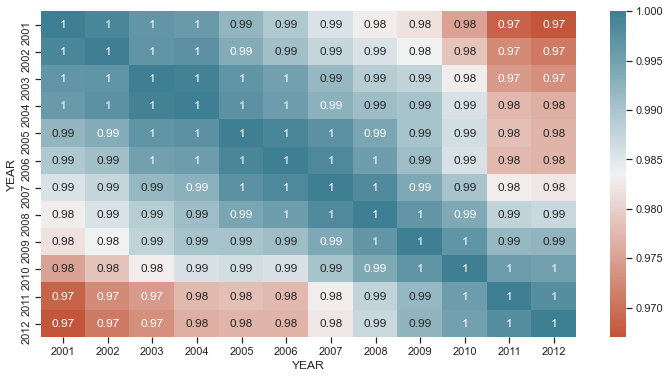

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

Most correlated with 2012 are 2005, 2006, 2007, 2008,2009, 2010 and 2011. Hence, we will be using these in our second model.

Model 1

For this model, years 2001 to 2011 will be our independant variables and 2012 will be our target value. We will be year_wise dataset here.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. For pur dataset, X is from year 2001 to 2011 and y is 2012.

In [72]:
X = year_wise2.iloc[:,0:11]
y = year_wise2.iloc[:,11]

Next, we split 70% of the data to the training set while 30% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class (which has been added at the top while importing other libaries), instantiate it, and call the fit() method along with our training data.

In [74]:
c = LinearRegression()
model1=c.fit(x_train,y_train)

This is used to obtain p-value and standard error. The OLS() function of the statsmodels.api module is used to perform OLS regression. 

code source - https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [75]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print(" ")
print("Residual Standard error",est2.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                   2012   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6147.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           7.95e-27
Time:                        16:58:25   Log-Likelihood:                -261.16
No. Observations:                  28   AIC:                             546.3
Df Residuals:                      16   BIC:                             562.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -176.8143   1111.538     -0.159      0.8

Now, score returns the coefficient of determination of the prediction

In [76]:
c.score(x_test,y_test)

0.967038188505321

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors. 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [77]:
y_pred = c.predict(x_test)

In [78]:
y_pred

array([  8023.9751137 ,  12887.28642465, 229153.20881171,  45139.07565818,
        48402.47873255,  40761.52234381,  33213.87487613, 596717.7059889 ,
        40605.95926702])

In [79]:
y_test

CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      7240
DOWRY DEATHS                                  16466
AUTO THEFT                                   308702
CRIMINAL BREACH OF TRUST                      35802
OTHER RAPE                                    49844
ROBBERY                                       54686
INSULT TO MODESTY OF WOMEN                    18346
THEFT                                        674814
ARSON                                         23672
Name: 2012, dtype: int64

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 24279.186957045094
Mean Squared Error: 1470158427.6463563
Root Mean Squared Error: 38342.64502673696


Now compare the actual output values for X_test with the predicted values

In [81]:
predicted_value = pd.DataFrame(y_pred, columns=["Predicted Value"])
predicted_value

,Predicted Value
0,8023.975114
1,12887.286425
2,229153.208812
3,45139.075658
4,48402.478733
5,40761.522344
6,33213.874876
7,596717.705989
8,40605.959267


In [82]:
actual_value = y_test.reset_index() 
actual_value.columns=["crimes","Actual Value"]
actual_value

,crimes,Actual Value
0,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,7240
1,DOWRY DEATHS,16466
2,AUTO THEFT,308702
3,CRIMINAL BREACH OF TRUST,35802
4,OTHER RAPE,49844
5,ROBBERY,54686
6,INSULT TO MODESTY OF WOMEN,18346
7,THEFT,674814
8,ARSON,23672


In [83]:
plotting = pd.concat([actual_value,predicted_value],axis=1)

In [84]:
def percentage_change(col1,col2):
    return (abs(col2 - col1) / col1) * 100

In [85]:
plotting['Percentage_difference'] = percentage_change(plotting['Predicted Value'],plotting['Actual Value'])  

<AxesSubplot:title={'center':'Actual vs Predicted'}, ylabel='crimes'>

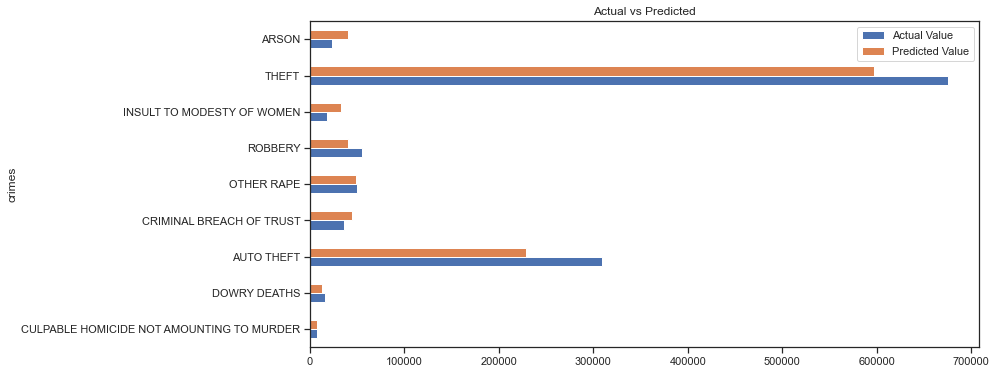

In [86]:
subset_plot = plotting.iloc[:,0:3]
subset_plot.plot(
    x = 'crimes',
    kind = 'barh',
    title = 'Actual vs Predicted',figsize=(12,6))

In [87]:
plotting

,crimes,Actual Value,Predicted Value,Percentage_difference
0,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,7240,8023.975114,9.770408
1,DOWRY DEATHS,16466,12887.286425,27.769334
2,AUTO THEFT,308702,229153.208812,34.714238
3,CRIMINAL BREACH OF TRUST,35802,45139.075658,20.685128
4,OTHER RAPE,49844,48402.478733,2.978197
5,ROBBERY,54686,40761.522344,34.160838
6,INSULT TO MODESTY OF WOMEN,18346,33213.874876,44.764048
7,THEFT,674814,596717.705989,13.087645
8,ARSON,23672,40605.959267,41.703138


Observation and results:

As observed from the table, our model 1 was able to predict quite well. Score gives 96% which is quite good. Although, there are places where model could not predict the actual output such as for the crimes insult to modesty of women and arson, prediction was way more than actual value.  

Model 2

For second model, we will be using year 2005, 2006, 2007, 2008,2009,2010 and 2011 as independent variables and 2012 as target variables. 

In [88]:
X1 = year_wise2.iloc[:,[4,5,6,7,8,9,10]]
y1 = year_wise2.iloc[:,11]

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.3,random_state = 0)

In [90]:
c1 = LinearRegression()

In [91]:
model2=c1.fit(x_train,y_train)

In [92]:
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())
print(" ")
print("Residual Standard error",est2.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                   2012   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4359.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.06e-30
Time:                        16:58:26   Log-Likelihood:                -275.42
No. Observations:                  28   AIC:                             566.8
Df Residuals:                      20   BIC:                             577.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1510.8471   1392.702      1.085      0.2

In [93]:
c1.score(x_test,y_test)

0.9853320663283976

In [94]:
y_pred1 = c1.predict(x_test)

In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 14082.861710025272
Mean Squared Error: 654217269.185735
Root Mean Squared Error: 25577.67130107303


In [96]:
predicted_value1 = pd.DataFrame(y_pred1, columns=["Predicted Value"])
predicted_value1

,Predicted Value
0,8354.813578
1,17258.280773
2,251685.692371
3,39772.238217
4,50424.397828
5,47683.972993
6,15932.106865
7,624284.753904
8,20345.448874


In [97]:
actual_value1 = y_test.reset_index() 
actual_value1.columns=["crimes","Actual Value"]
actual_value1

,crimes,Actual Value
0,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,7240
1,DOWRY DEATHS,16466
2,AUTO THEFT,308702
3,CRIMINAL BREACH OF TRUST,35802
4,OTHER RAPE,49844
5,ROBBERY,54686
6,INSULT TO MODESTY OF WOMEN,18346
7,THEFT,674814
8,ARSON,23672


In [98]:
plotting1 = pd.concat([actual_value1,predicted_value1],axis=1)

In [99]:
plotting1['Percentage_difference'] = percentage_change(plotting1['Predicted Value'],plotting1['Actual Value'])  

<AxesSubplot:title={'center':'Actual vs Predicted'}, ylabel='crimes'>

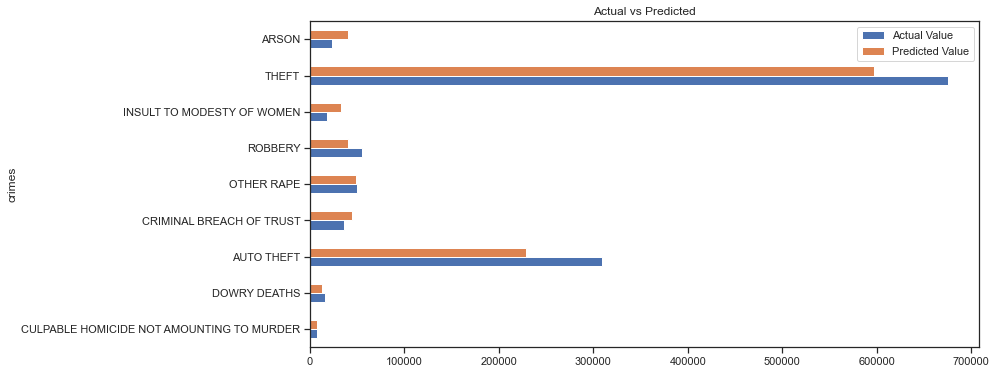

In [100]:
subset_plot1 = plotting.iloc[:,0:3]
subset_plot1.plot(
    x = 'crimes',
    kind = 'barh',
    title = 'Actual vs Predicted',figsize=(12,6))

In [101]:
plotting1

,crimes,Actual Value,Predicted Value,Percentage_difference
0,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,7240,8354.813578,13.343369
1,DOWRY DEATHS,16466,17258.280773,4.590728
2,AUTO THEFT,308702,251685.692371,22.653774
3,CRIMINAL BREACH OF TRUST,35802,39772.238217,9.982436
4,OTHER RAPE,49844,50424.397828,1.151026
5,ROBBERY,54686,47683.972993,14.684236
6,INSULT TO MODESTY OF WOMEN,18346,15932.106865,15.151123
7,THEFT,674814,624284.753904,8.093942
8,ARSON,23672,20345.448874,16.350345


Observation and results:

For model 2, the score was higher than the model 1 which 98.53%. This mean that model 2 was able to predict almost accurate to the actual results. Hence, out of two models we will be taking model 2 as a better option, seeing all its performance metrics and scores. 

Disclaimer: All the coding has been done by me but reference has been taken for creating plots from matplotlib documentaion (https://matplotlib.org/stable/index.html) and pandas documentaion (https://pandas.pydata.org/docs/index.html)

******************************************************************************************************************************